## Aykırı Verinin Tespiti

### Histogram ile Aykrıı veri Teşhisi

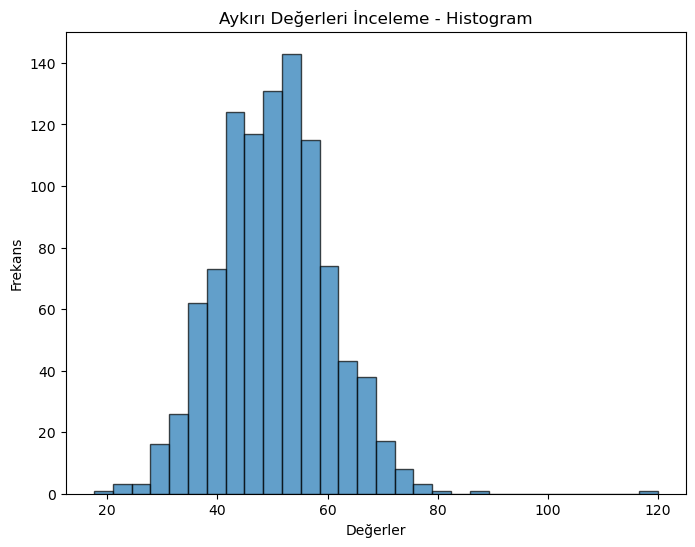

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Örnek veri seti oluşturalım
np.random.seed(42)
veri_seti = np.random.normal(loc=50, scale=10, size=1000)
veri_seti[950] = 120  # Aykırı değer ekleyelim

# Histogramı oluşturalım
plt.figure(figsize=(8, 6))
plt.hist(veri_seti, bins=30, edgecolor='black', alpha=0.7)
plt.title('Aykırı Değerleri İnceleme - Histogram')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.show()

### Z-Score ve Tukey's Fence

In [2]:
import numpy as np
from scipy.stats import zscore

np.random.seed(42)
veri_seti = np.random.normal(loc=50, scale=10, size=1000)
veri_seti[950] = 120  

z_skorlari = zscore(veri_seti)

aykiri_degerler_z = np.where(np.abs(z_skorlari) > 3)[0]

Q1 = np.percentile(veri_seti, 25)
Q3 = np.percentile(veri_seti, 75)
IQR = Q3 - Q1

alt_sinir_tukey = Q1 - 1.5 * IQR
ust_sinir_tukey = Q3 + 1.5 * IQR
aykiri_degerler_tukey = np.where((veri_seti < alt_sinir_tukey) | (veri_seti > ust_sinir_tukey))[0]

aykiri_degerler_toplam = np.union1d(aykiri_degerler_z, aykiri_degerler_tukey)

print("Z-Skoru Aykırı Değerlerin İndeksleri:", aykiri_degerler_z)
print("Tukey's Fence Aykırı Değerlerin İndeksleri:", aykiri_degerler_tukey)
print("Toplam Aykırı Değerlerin İndeksleri:", aykiri_degerler_toplam)


Z-Skoru Aykırı Değerlerin İndeksleri: [209 262 478 950]
Tukey's Fence Aykırı Değerlerin İndeksleri: [ 74 179 209 262 478 646 668 755 950]
Toplam Aykırı Değerlerin İndeksleri: [ 74 179 209 262 478 646 668 755 950]


### Boxplot ile Aykırı veri tespiti

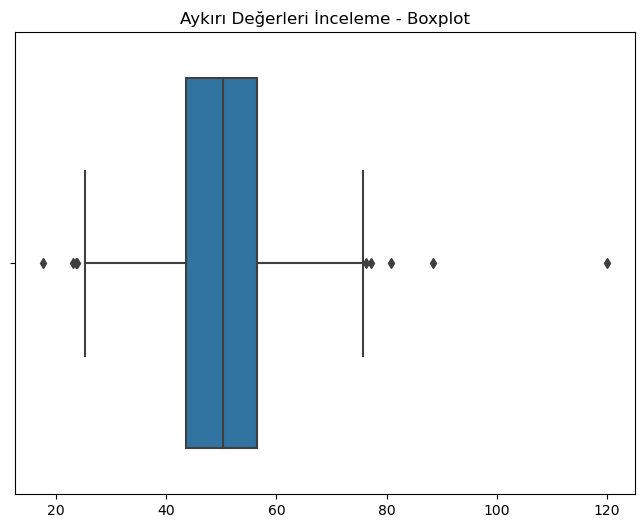

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

np.random.seed(42)
veri_seti = np.random.normal(loc=50, scale=10, size=1000)
veri_seti[950] = 120  


plt.figure(figsize=(8, 6))
sb.boxplot(x=veri_seti)
plt.title('Aykırı Değerleri İnceleme - Boxplot')
plt.show()

### K-Means

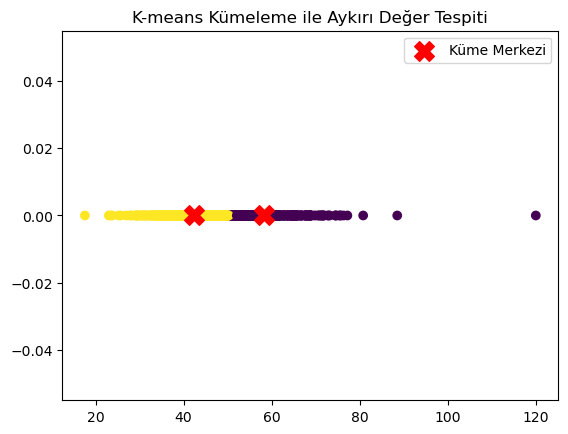

In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)
veri_seti = np.random.normal(loc=50, scale=10, size=1000)
veri_seti[950] = 120  #

X = veri_seti.reshape(-1, 1) #yeniden şekillendirme

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

kume_etiketleri = kmeans.predict(X)

plt.scatter(X, np.zeros_like(X), c=kume_etiketleri, cmap='viridis')
plt.scatter(kmeans.cluster_centers_, [0, 0], marker='X', color='red', s=200, label='Küme Merkezi')
plt.title('K-means Kümeleme ile Aykırı Değer Tespiti')
plt.legend()
plt.show()


### Isolation Forest ve LOF

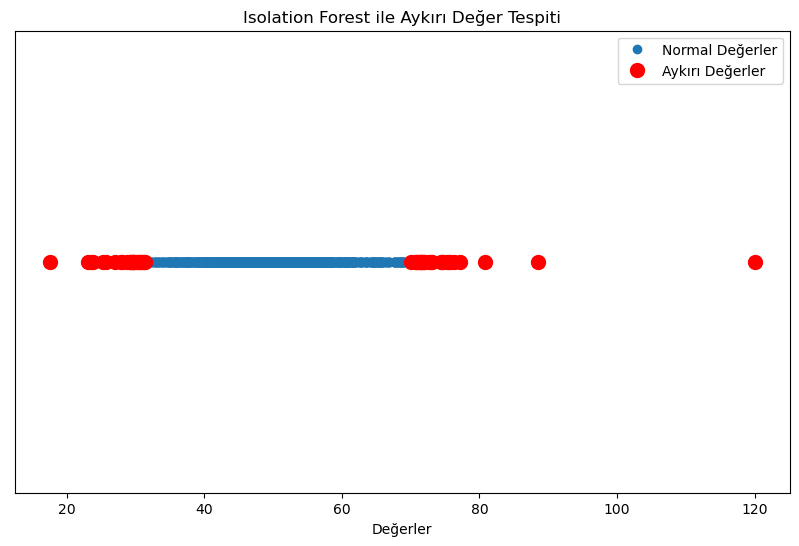

In [5]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
veri_seti = np.random.normal(loc=50, scale=10, size=1000)
veri_seti[950] = 120 

X = veri_seti.reshape(-1, 1)


isolation_forest = IsolationForest(contamination=0.05, random_state=42)
y_pred = isolation_forest.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.plot(X[y_pred == 1], np.zeros_like(X[y_pred == 1]), 'o', label='Normal Değerler', markersize=6)
plt.plot(X[y_pred == -1], np.zeros_like(X[y_pred == -1]), 'ro', label='Aykırı Değerler', markersize=10)
plt.title('Isolation Forest ile Aykırı Değer Tespiti')
plt.xlabel('Değerler')
plt.yticks([])  # Y ekseni etiketlerini kapatma
plt.legend()
plt.show()



# Aykırı Veri Çözümleri

## 1-Logaritmik Dönüşüm

In [6]:
import numpy as np
veri = np.array([10, 20, 30, 40, 50, 1000])
logaritmik_donusum = np.log(veri)
print("Orijinal Veri:", veri)
print("Logaritmik Dönüşüm:", logaritmik_donusum)

Orijinal Veri: [  10   20   30   40   50 1000]
Logaritmik Dönüşüm: [2.30258509 2.99573227 3.40119738 3.68887945 3.91202301 6.90775528]


## Karekök Dönüşüm

In [7]:
import numpy as np
veri = np.array([10, 20, 30, 40, 50, 1000])
kok_donusum = np.sqrt(veri)
print("Orijinal Veri:", veri)
print("Karekök Dönüşüm:", kok_donusum)


Orijinal Veri: [  10   20   30   40   50 1000]
Karekök Dönüşüm: [ 3.16227766  4.47213595  5.47722558  6.32455532  7.07106781 31.6227766 ]


# Küpkök Dönüşüm

In [8]:
import numpy as np
veri = np.array([10, 20, 30, -40, 50, -1000])
donusturulen_veri = np.abs(veri)
kupkok_donusum = np.cbrt(donusturulen_veri)
print("Orijinal Veri:", veri)
print("Küpkök Dönüşüm:", kupkok_donusum)

Orijinal Veri: [   10    20    30   -40    50 -1000]
Küpkök Dönüşüm: [ 2.15443469  2.71441762  3.10723251  3.41995189  3.6840315  10.        ]


## Box-Cox

In [9]:
from scipy.stats import boxcox
import numpy as np

veri = np.array([10, 20, 30, 40, 50, 1000])
bc_veri, lambda_degeri = boxcox(veri)

print("Orijinal Veri:", veri)
print("Box-Cox Dönüşümü:", bc_veri)
print("En İyi Lambda Değeri:", lambda_degeri)


Orijinal Veri: [  10   20   30   40   50 1000]
Box-Cox Dönüşümü: [1.43980977 1.65355252 1.75118282 1.8105003  1.8515499  2.14086596]
En İyi Lambda Değeri: -0.4455908209744566


## Winsorize

In [14]:
from scipy.stats.mstats import winsorize
import numpy as np
veri = np.array([10,15,20,25,30,35,40,45, 50,55,60, 1000])
donusturulmus_veri = winsorize(veri, limits=(0.12, 0.24))

print("Orijinal Veri:", veri)
print("Winsorized Veri:", donusturulmus_veri)


Orijinal Veri: [  10   15   20   25   30   35   40   45   50   55   60 1000]
Winsorized Veri: [15 15 20 25 30 35 40 45 50 55 55 55]


## Huber Regresyonu

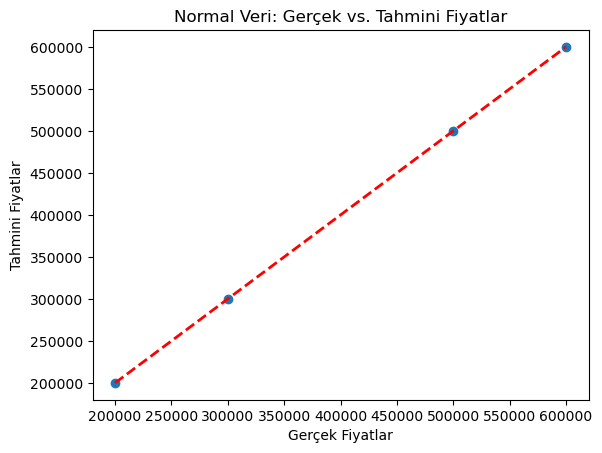

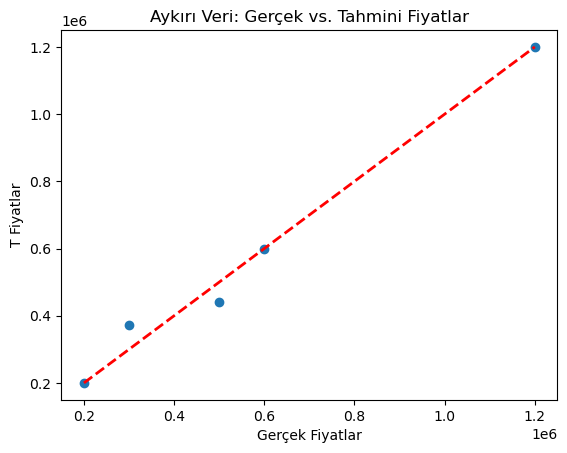

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
x1 = np.array([ #araba özellikleri
    [3, 150, 20, 1],
    [4, 200, 10, 2],
    [2, 100, 5, 3],
    [5, 250, 15, 4]
])

y1 = np.array([300000, 500000, 200000, 600000]) #araba fiyatı

# Huber Regresyonu modeli oluşturma ve eğitme
h1 = HuberRegressor(epsilon=1.35)
h1.fit(x1, y1)

# Modelin eğim ve düzlem değerlerini almak
c1 = h1.coef_
i1 = h1.intercept_

# Tahminleri yapmak
y1_pred = h1.predict(x1)

plt.scatter(y1, y1_pred)
plt.plot([min(y1), max(y1)], [min(y1), max(y1)], linestyle='--', color='red', linewidth=2)
plt.title('Normal Veri: Gerçek vs. Tahmini Fiyatlar')
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('Tahmini Fiyatlar')
plt.show()


x2 = np.vstack([x1, [8, 300, 100, 5]])
y2 = np.append(y1, 1200000)  

h2 = HuberRegressor(epsilon=1.35)
h2.fit(x2, y2)

c2 = h2.coef_
i2 = h2.intercept_

y2_pred = h2.predict(x2)

plt.scatter(y2, y2_pred)
plt.plot([min(y2), max(y2)], [min(y2), max(y2)], linestyle='--', color='red', linewidth=2)
plt.title('Aykırı Veri: Gerçek vs. Tahmini Fiyatlar')
plt.xlabel('Gerçek Fiyatlar')
plt.ylabel('T Fiyatlar')
plt.show()

## RANSAC

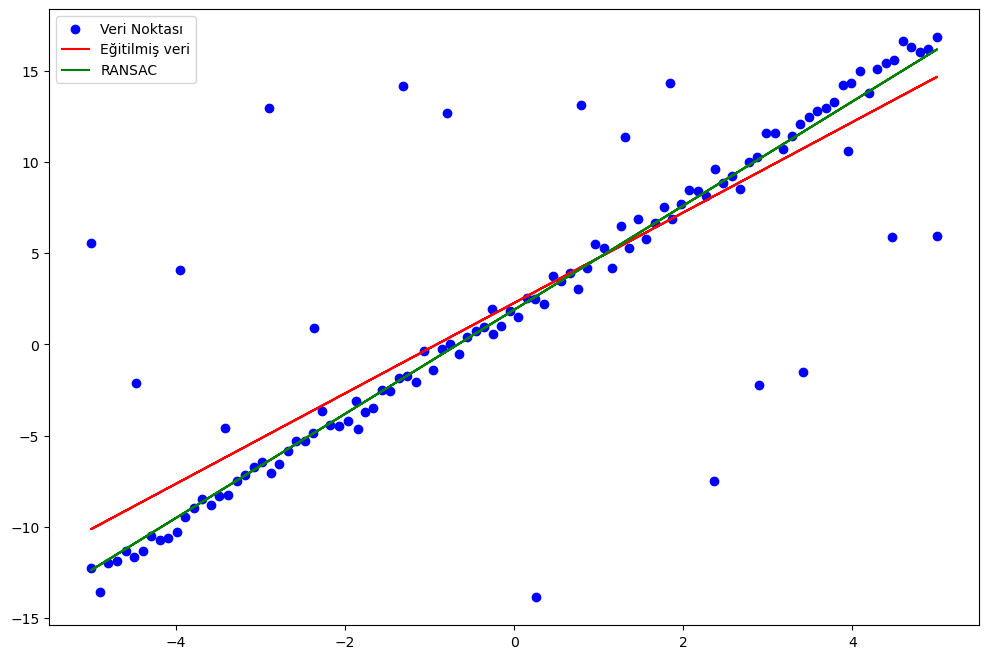

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 100 Normal veri
X_normal = np.linspace(-5, 5, 100)
y_normal = 3 * X_normal + 2 + np.random.normal(0, 0.5, 100)

#20 aykırı veri
X_aykiri = np.linspace(-5, 5, 20)
y_aykiri = 30 * (np.random.random(20) - 0.5)

#normal ve aykırı verileri birleştirme
X = np.concatenate((X_normal, X_aykiri))
y = np.concatenate((y_normal, y_aykiri))

#model eğitimi içi x'i yeniden şekillendirme
X = X.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)

# RANSAC
iteration = 100
n_sample = X.shape[0]
sample_size = int(n_sample * 0.6)
t = 0.1
best_model = None
best_inlier_num = 0

for _ in range(iteration):
    sample = np.random.choice(n_sample, sample_size)
    X_sample = X[sample]
    y_sample = y[sample]

    model_sample = LinearRegression().fit(X_sample, y_sample)
    y_sample_pred = model_sample.predict(X)

    residuals = np.abs(y_sample_pred - y)
    inliers = residuals < t
    inlier_num = np.count_nonzero(inliers)

    if inlier_num > best_inlier_num:
        best_inlier_num = inlier_num
        best_model = model_sample

plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Veri Noktası')
plt.plot(X, y_pred, color='red', label='Eğitilmiş veri')

y_pred_ransac = best_model.predict(X)
plt.plot(X, y_pred_ransac, color='green', label='RANSAC')
plt.legend()
plt.show()

## Theil-Sen Regresyonu

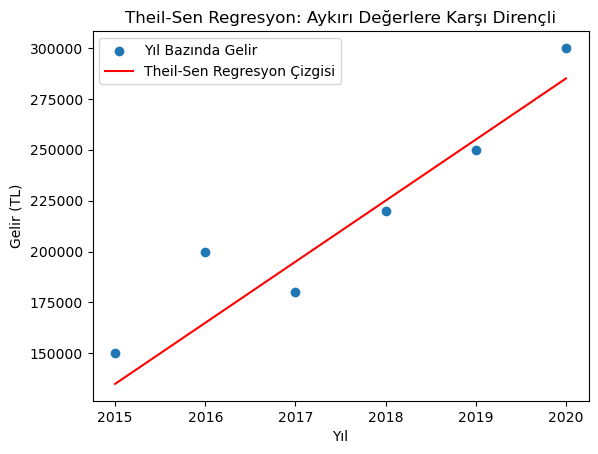

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import theilslopes

yillar = np.array([2015, 2016, 2017, 2018, 2019, 2020])
gelirler = np.array([150000, 200000, 180000, 220000, 250000, 300000])

slope, intercept, _, _ = theilslopes(gelirler, yillar)

yil = np.array([min(yillar), max(yillar)])
gelir = slope * yil + intercept

plt.scatter(yillar, gelirler, label='Yıl Bazında Gelir')
plt.plot(yil, gelir, color='red', label='Theil-Sen Regresyon Çizgisi')
plt.title('Theil-Sen Regresyon: Aykırı Değerlere Karşı Dirençli')
plt.xlabel('Yıl')
plt.ylabel('Gelir (TL)')
plt.legend()
plt.show()



## M Regresyonu

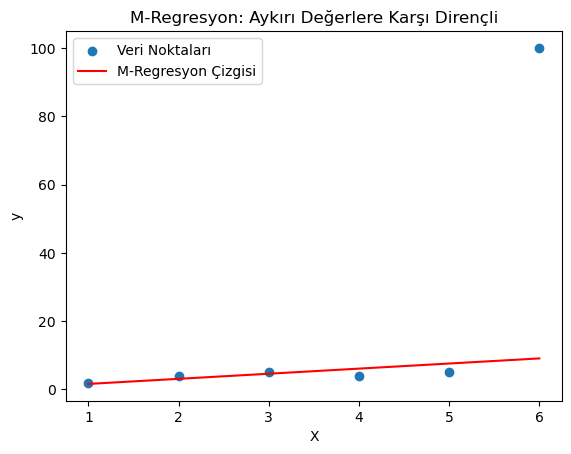

In [19]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 4, 5, 4, 5, 100])  # Aykırı değer eklenmiş

X = sm.add_constant(X)
huber = sm.RLM(y, X, M=sm.robust.norms.HuberT())
sonuc = huber.fit()

intercept, slope = sonuc.params

X_cizgisi = np.array([min(X[:, 1]), max(X[:, 1])])
y_cizgisi = intercept + slope * X_cizgisi

# Scatter plot (Nokta grafiği) çizimi
plt.scatter(X[:, 1], y, label='Veri Noktaları')
plt.plot(X_cizgisi, y_cizgisi, color='red', label='M-Regresyon Çizgisi')
plt.title('M-Regresyon: Aykırı Değerlere Karşı Dirençli')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
